In [1]:
#Question 1

In [2]:
C4=groups.permutation.Cyclic(4)

In [3]:
C4.cayley_table()

*  a b c d
 +--------
a| a b c d
b| b c d a
c| c d a b
d| d a b c


In [4]:
C4.cayley_table(names='elements')

         *          ()  (1,2,3,4) (1,3)(2,4)  (1,4,3,2)
          +--------------------------------------------
        ()|         ()  (1,2,3,4) (1,3)(2,4)  (1,4,3,2)
 (1,2,3,4)|  (1,2,3,4) (1,3)(2,4)  (1,4,3,2)         ()
(1,3)(2,4)| (1,3)(2,4)  (1,4,3,2)         ()  (1,2,3,4)
 (1,4,3,2)|  (1,4,3,2)         ()  (1,2,3,4) (1,3)(2,4)


In [5]:
t_C4=C4.cayley_table().table()

In [6]:
t_C4

[[0, 1, 2, 3], [1, 2, 3, 0], [2, 3, 0, 1], [3, 0, 1, 2]]

In [7]:
E_C4=C4.cayley_table().column_keys()

In [8]:
E_C4

((), (1,2,3,4), (1,3)(2,4), (1,4,3,2))

In [9]:
C2=groups.permutation.Cyclic(2)

In [10]:
t_C2=C2.cayley_table().table()

In [11]:
t_C2

[[0, 1], [1, 0]]

In [12]:
E_C2=C2.cayley_table().column_keys()

In [13]:
E_C2

((), (1,2))

In [14]:
C2xC2=cartesian_product([C2,C2])

In [15]:
C2xC2.cayley_table()

*  a b c d
 +--------
a| a b c d
b| b a d c
c| c d a b
d| d c b a


In [16]:
t_C2xC2=C2xC2.cayley_table().table()

In [17]:
t_C2xC2

[[0, 1, 2, 3], [1, 0, 3, 2], [2, 3, 0, 1], [3, 2, 1, 0]]

In [18]:
E_C2xC2=C2xC2.cayley_table().column_keys()

In [19]:
E_C2xC2

(((), ()), ((), (1,2)), ((1,2), ()), ((1,2), (1,2)))

In [20]:
#Question 2

In [21]:
def neutre(table):
    for alpha in range(len(table)):
        for i in range(len(table)):
            if table[i][alpha]==i and table[alpha][i]==i:
                if i==3:
                    return alpha
                   
                else:
                    continue
            else:
                break
    return ()

In [22]:
e_C4=neutre(t_C4)

In [23]:
e_C4

0

In [24]:
e_C2xC2=neutre(t_C2xC2)

In [25]:
e_C2xC2

0

In [26]:
neutre([[0, 1, 3, 2], [1, 0, 3, 2], [2, 3, 0, 1], [3, 2, 1, 0]])

()

In [27]:
#Question 3

In [28]:
def symetrique(table):
    e=neutre(table)
    for i in range(len(table)):
        for j in range(len(table)):
            if table[i][j]==e and table[j][i]==e :
                print(f"Le symétrique de {i} est {j}")
                break
            else: 
                continue

In [29]:
symetrique(t_C4)

Le symétrique de 0 est 0
Le symétrique de 1 est 3
Le symétrique de 2 est 2
Le symétrique de 3 est 1


In [30]:
symetrique(t_C2xC2)

Le symétrique de 0 est 0
Le symétrique de 1 est 1
Le symétrique de 2 est 2
Le symétrique de 3 est 3


In [31]:
def is_symetrique(table):
    e=neutre(table)
    les_symetriques=[]
    for i in range(len(table)):
        for j in range(len(table)):
            if table[i][j]==e and table[j][i]==e :
                les_symetriques.append(i)
                break
            else: 
                continue
    for i in range(len(table)):
        if i not in les_symetriques:
            return False
    return True

In [32]:
is_symetrique(t_C4)

True

In [33]:
is_symetrique(t_C2xC2)

True

In [34]:
#Question 4

In [35]:
def associativite(table):
    for i in range(len(table)):
        for j in range(len(table)):
            for k in range (len(table)):
                if table[table[i][j]][k]!=table[i][table[j][k]]:
                    return False
    return True

In [36]:
associativite(t_C4)

True

In [37]:
associativite(t_C2xC2)

True

In [38]:
#Question 5

In [39]:
#1)

In [40]:
def is_group(table):
    return associativite(table) and is_symetrique(table) and ( neutre(table)!= '()')
    

In [41]:
is_group(t_C4)

True

In [42]:
t1=[[0,1,2,3],[1,0,3,2],[2,3,1,0],[3,2,0,1]]

In [43]:
def is_morphisme(f,table1,table2):
    for i in range(len(table1)):
        for j in range(len(table1)):
            if (f[table1[i][j]]!=table2[f[i]][f[j]]):
                return False
    return True

In [44]:
f1=[0,1,2,3]

In [45]:
is_morphisme(f1,t_C4,t_C4)

True

In [46]:
f2=[1,0,2,3]

In [47]:
is_morphisme(f2,t_C4,t_C4)

False

In [48]:
from itertools import product
def combinaison(n):
    c=[]
    for i in permutation(n):
        c.append(i)
    return c
    

In [49]:
def produit_cat(n):
    from itertools import product
    return list(product(range(n), repeat=n))

In [50]:
def trouver_morphisme(table1,table2):
    o=[]
    liste=produit_cat(len(table1))

    for i in liste:
        if(is_morphisme(i,table1,table2)):
            o.append(i);
    return o

In [51]:
endomorphisme_C4=trouver_morphisme(t_C4,t_C4)

In [52]:
endomorphisme_C4 # on a bien les endormophismes générés par 0,1,2 et 3 

[(0, 0, 0, 0), (0, 1, 2, 3), (0, 2, 0, 2), (0, 3, 2, 1)]

In [53]:
test1=PermutationGroupMorphism(C4,C4,C4.gen())

In [54]:
test1

Permutation group endomorphism of Cyclic group of order 4 as a permutation group
  Defn: [(1,2,3,4)] -> [(1,2,3,4)]

In [55]:
endormorphisme_C2xC2=trouver_morphisme(t_C2xC2,t_C2xC2)

In [56]:
endormorphisme_C2xC2

[(0, 0, 0, 0),
 (0, 0, 1, 1),
 (0, 0, 2, 2),
 (0, 0, 3, 3),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (0, 1, 2, 3),
 (0, 1, 3, 2),
 (0, 2, 0, 2),
 (0, 2, 1, 3),
 (0, 2, 2, 0),
 (0, 2, 3, 1),
 (0, 3, 0, 3),
 (0, 3, 1, 2),
 (0, 3, 2, 1),
 (0, 3, 3, 0)]

In [57]:
#2)

In [58]:
def is_injective(f):
    p=[]
    for i in f:
        if i not in p:
            p.append(i)
        else:
            return False
    return True

In [59]:
is_injective([0,1,2,3])

True

In [60]:
def is_surjective(f,table):
    p=[]
    count=0
    for i in f:
        if f[i] not in p:
            p.append(f[i])
            count=count+1
    return count==len(table)
    

In [61]:
is_surjective([1,2,0,3],[1,2,3])

False

In [62]:
def is_bijective(f,table):
    return (is_surjective(f,table) and is_injective(table))

In [63]:
is_bijective([1,2,0,3],[1,2,3,0])

True

In [64]:
def trouver_isomorphisme(table1,table2):
    o=[]
    liste=produit_cat(len(table1))
    for i in liste: 
        if(is_morphisme(i,table1,table2) and is_bijective(i,table2)):
            o.append(i);
    return o

In [65]:
trouver_isomorphisme(t_C2xC2,t_C2xC2)

[(0, 1, 2, 3),
 (0, 1, 3, 2),
 (0, 2, 1, 3),
 (0, 2, 3, 1),
 (0, 3, 1, 2),
 (0, 3, 2, 1)]

In [66]:
trouver_isomorphisme(t_C4,t_C4)

[(0, 1, 2, 3), (0, 3, 2, 1)]

In [67]:
C4.is_isomorphic(C4)

True

In [68]:
Group_C2xC2=groups.permutation.KleinFour() #indispensable pour utiliser la méthode is_isomorphic

In [69]:
Group_C2xC2.is_isomorphic(Group_C2xC2)

True

In [70]:
#3)

In [71]:
def est_isomorphique(table1,table2):
    return  trouver_isomorphisme(table1,table2) != []

In [72]:
trouver_isomorphisme(t_C4,t_C2xC2)

[]

In [73]:
est_isomorphique(t_C2xC2,t_C4)

False

In [74]:
#4)

In [75]:
Group_C2xC2.cayley_table()

*  a b c d
 +--------
a| a b c d
b| b a d c
c| c d a b
d| d c b a


In [76]:
Group_C2xC2.is_isomorphic(C4)

False

In [77]:
#Question 7

In [78]:
#Test sur les permetutations

In [79]:
g=PermutationGroupElement([2,1,4,3])

In [80]:
g

(1,2)(3,4)

In [81]:
Permutation(g)

[2, 1, 4, 3]

In [82]:
#1) Test si ce sont des goupes

In [83]:
t1=[[0,1,2,3],[1,0,3,2],[2,3,1,0],[3,2,0,1]] #I

In [84]:
is_group(t1)

True

In [85]:
t2=[[0,1,2,3],[1,0,3,2],[2,3,0,1],[3,2,1,0]] #II

In [86]:
is_group(t2)

True

In [87]:
t3=[[0,1,2,3],[1,2,3,0],[2,3,0,1],[3,0,1,2]] #III

In [88]:
is_group(t3)

True

In [89]:
t4=[[0,1,2,3],[1,3,0,2],[2,0,3,1],[3,2,1,0]] #IV

In [90]:
is_group(t4)

True

In [91]:
PermutationGroup([[1,2,3,4],[2,4,1,3],[3,1,4,2],[4,3,2,1]])

Permutation Group with generators [(), (1,2,4,3), (1,3,4,2), (1,4)(2,3)]

In [92]:
#2)

In [93]:
G1 = PermutationGroup(['(1,3,2,4)']) #I 

In [94]:
G1.cayley_table()

*  a b c d
 +--------
a| a b c d
b| b a d c
c| c d b a
d| d c a b


In [95]:
G2=PermutationGroup([[1,2,3,4],[2,1,4,3],[3,4,1,2],[4,3,2,1]]) #II équivalent à C2xC2

In [96]:
G2.cayley_table()

*  a b c d
 +--------
a| a b c d
b| b a d c
c| c d a b
d| d c b a


In [97]:
G3 = PermutationGroup(['(1,2,3,4)']) #III  équivalent à C4

In [98]:
G3.cayley_table()

*  a b c d
 +--------
a| a b c d
b| b c d a
c| c d a b
d| d a b c


In [99]:
G4= PermutationGroup(['(1,2,4,3)']) #IV 

In [100]:
G4.cayley_table()

*  a b c d
 +--------
a| a b c d
b| b d a c
c| c a d b
d| d c b a


In [101]:
#Test des isomorphismes avec C4

In [102]:
C4.is_isomorphic(G1)

True

In [103]:
C4.is_isomorphic(G2)

False

In [104]:
C4.is_isomorphic(G3)

True

In [105]:
C4.is_isomorphic(G4)

True

In [106]:
#Test des isomorphismes avec C2xC2 

In [107]:
Group_C2xC2.is_isomorphic(G1)

False

In [108]:
Group_C2xC2.is_isomorphic(G2)

True

In [109]:
Group_C2xC2.is_isomorphic(G3)

False

In [110]:
Group_C2xC2.is_isomorphic(G4)

False

In [111]:
#Question 8

In [112]:
G1.list()

[(), (1,3,2,4), (1,2)(3,4), (1,4,2,3)]

In [113]:
G1.order()

4

In [114]:
list(map(order,G1.subgroups()))

[1, 2, 4]

In [115]:
list(map(order,G3.subgroups()))

[1, 2, 4]

In [116]:
list(map(order,Group_C2xC2.subgroups()))

[1, 2, 2, 2, 4]

In [117]:
Test1=CyclicPermutationGroup(8)

In [118]:
list(map(order,Test1.subgroups()))

[1, 2, 4, 8]

In [119]:
Test1.order()

8

In [120]:
Test2=DihedralGroup(5) 

In [121]:
list(map(order,Test2.subgroups()))

[1, 2, 2, 2, 2, 2, 5, 10]

In [122]:
Test2.order()

10

In [123]:
Test3=AlternatingGroup(4)

In [124]:
list(map(order,Test3.subgroups()))

[1, 2, 2, 2, 3, 3, 3, 3, 4, 12]

In [125]:
Test3.order()

12

In [126]:
#Question 10

In [127]:
#test de quelques graphes

In [128]:
C = G1.cayley_graph()
C.show3d(bgcolor=(0,0,0), arc_color=(1,1,1), vertex_size=0.02, arc_size=0.007, arc_size2=0.01, xres=1000, yres=800, iterations=200)

Graphics3d Object

In [129]:
C = Test2.cayley_graph()
C.show3d(bgcolor=(0,0,0), arc_color=(1,1,1), vertex_size=0.02, arc_size=0.007, arc_size2=0.01, xres=1000, yres=800, iterations=200)

Graphics3d Object

In [130]:
S4=SymmetricGroup(4)

In [131]:
S4

Symmetric group of order 4! as a permutation group

In [132]:
NOT=S4([(1,3),(2,4)])
CNOT=S4([(3,4)])
SWAP=S4([(2,3)])
Generateur1 = [NOT ,CNOT]
Generateur2 = [CNOT,SWAP]
Generateur3 = [NOT,SWAP]

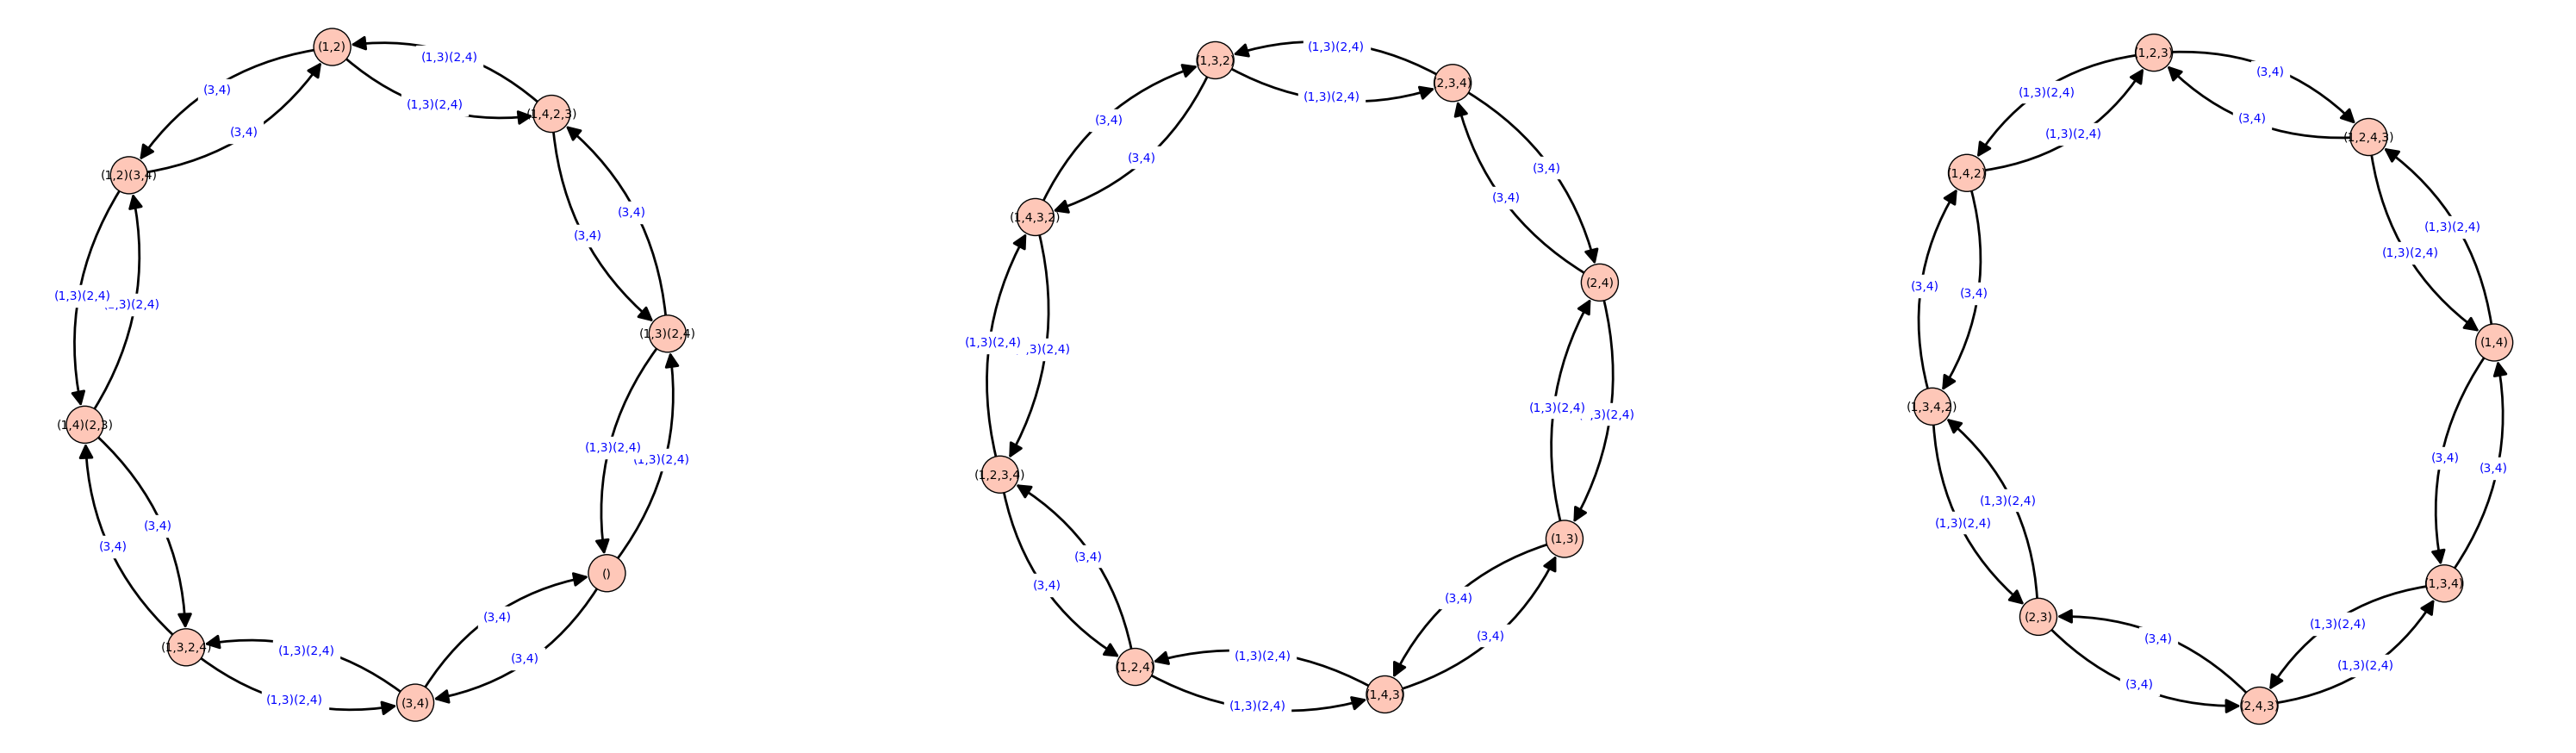

In [133]:
d1 = S4.cayley_graph(generators=Generateur1)
d1.show(figsize=30,edge_labels=True)

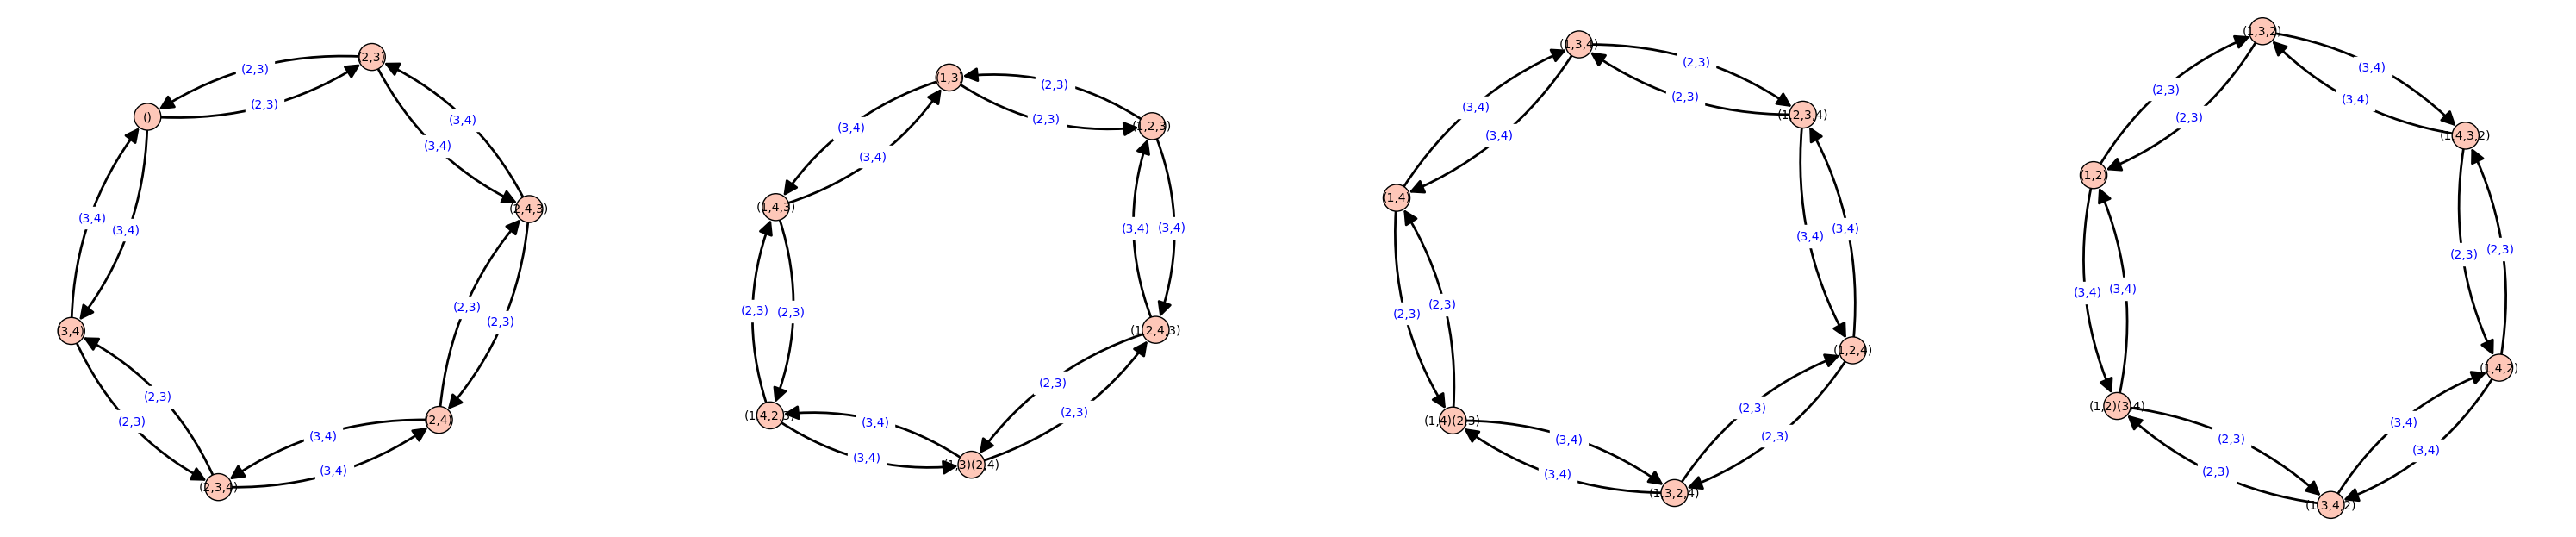

In [134]:
d2 = S4.cayley_graph(generators=Generateur2)
d2.show(figsize=30,edge_labels=True)

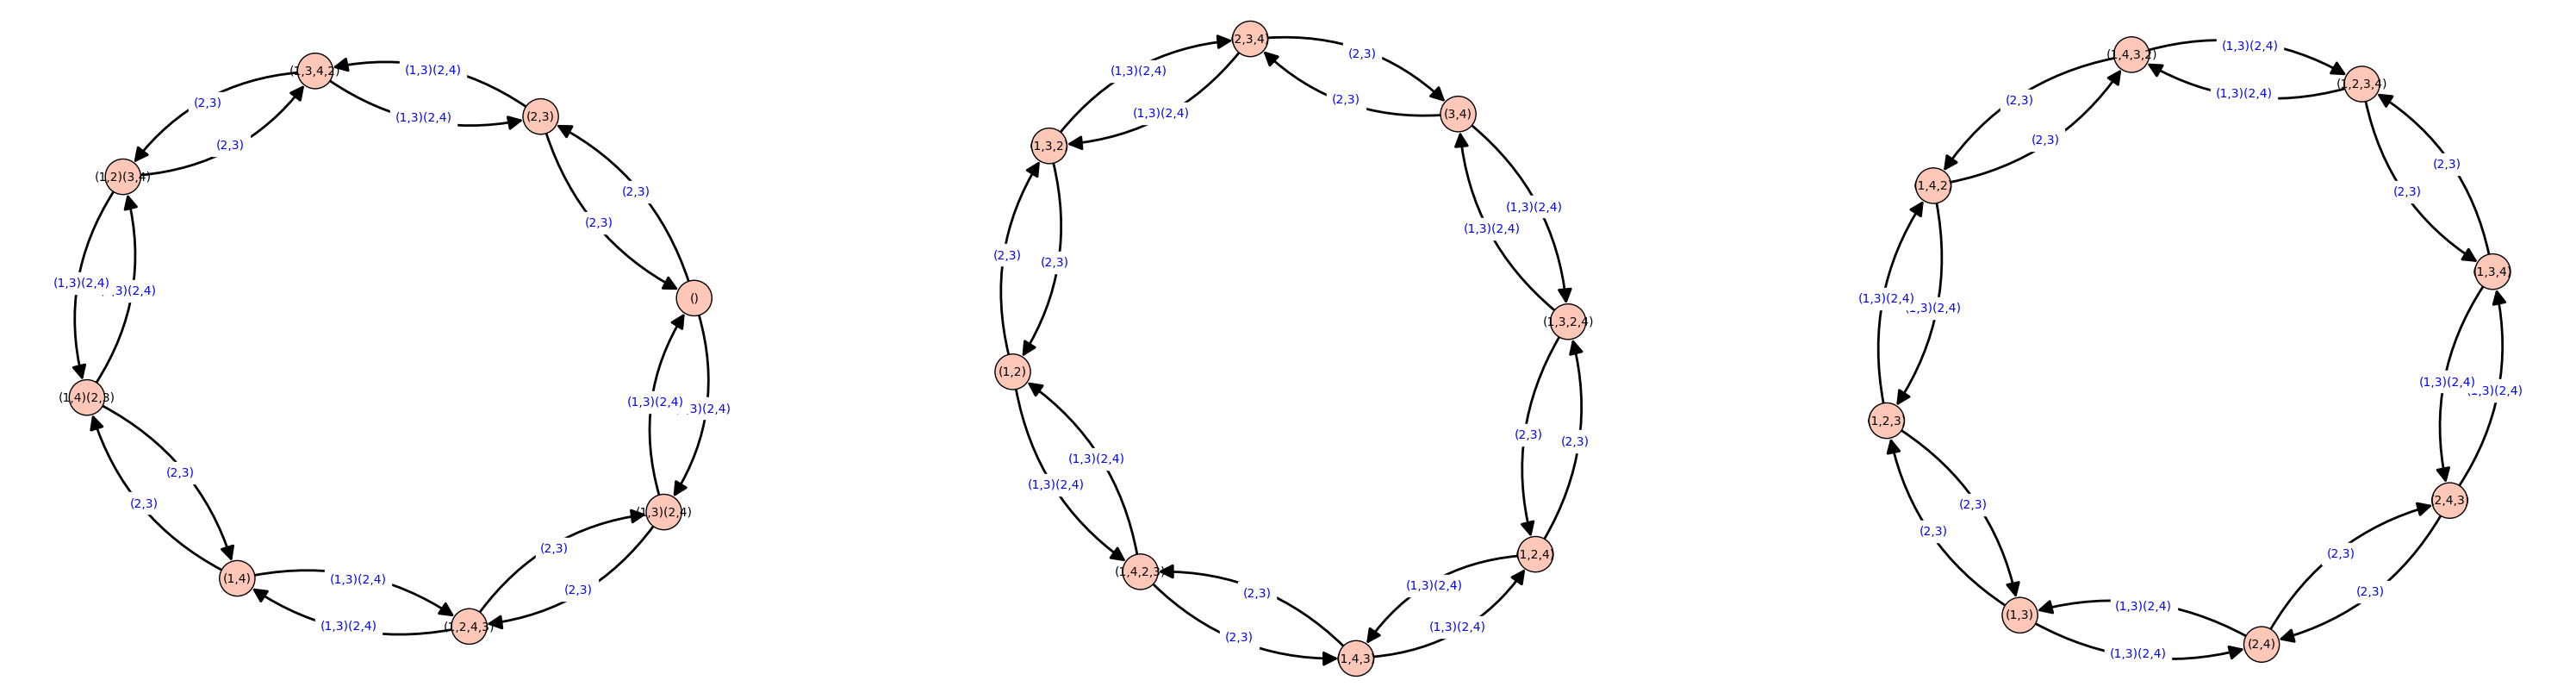

In [135]:
d3 = S4.cayley_graph(generators=Generateur3)
d3.show(figsize=30,edge_labels=True)

In [136]:
#Tracer du graphe de S4

In [137]:
Generateur4 = [NOT ,CNOT,SWAP]

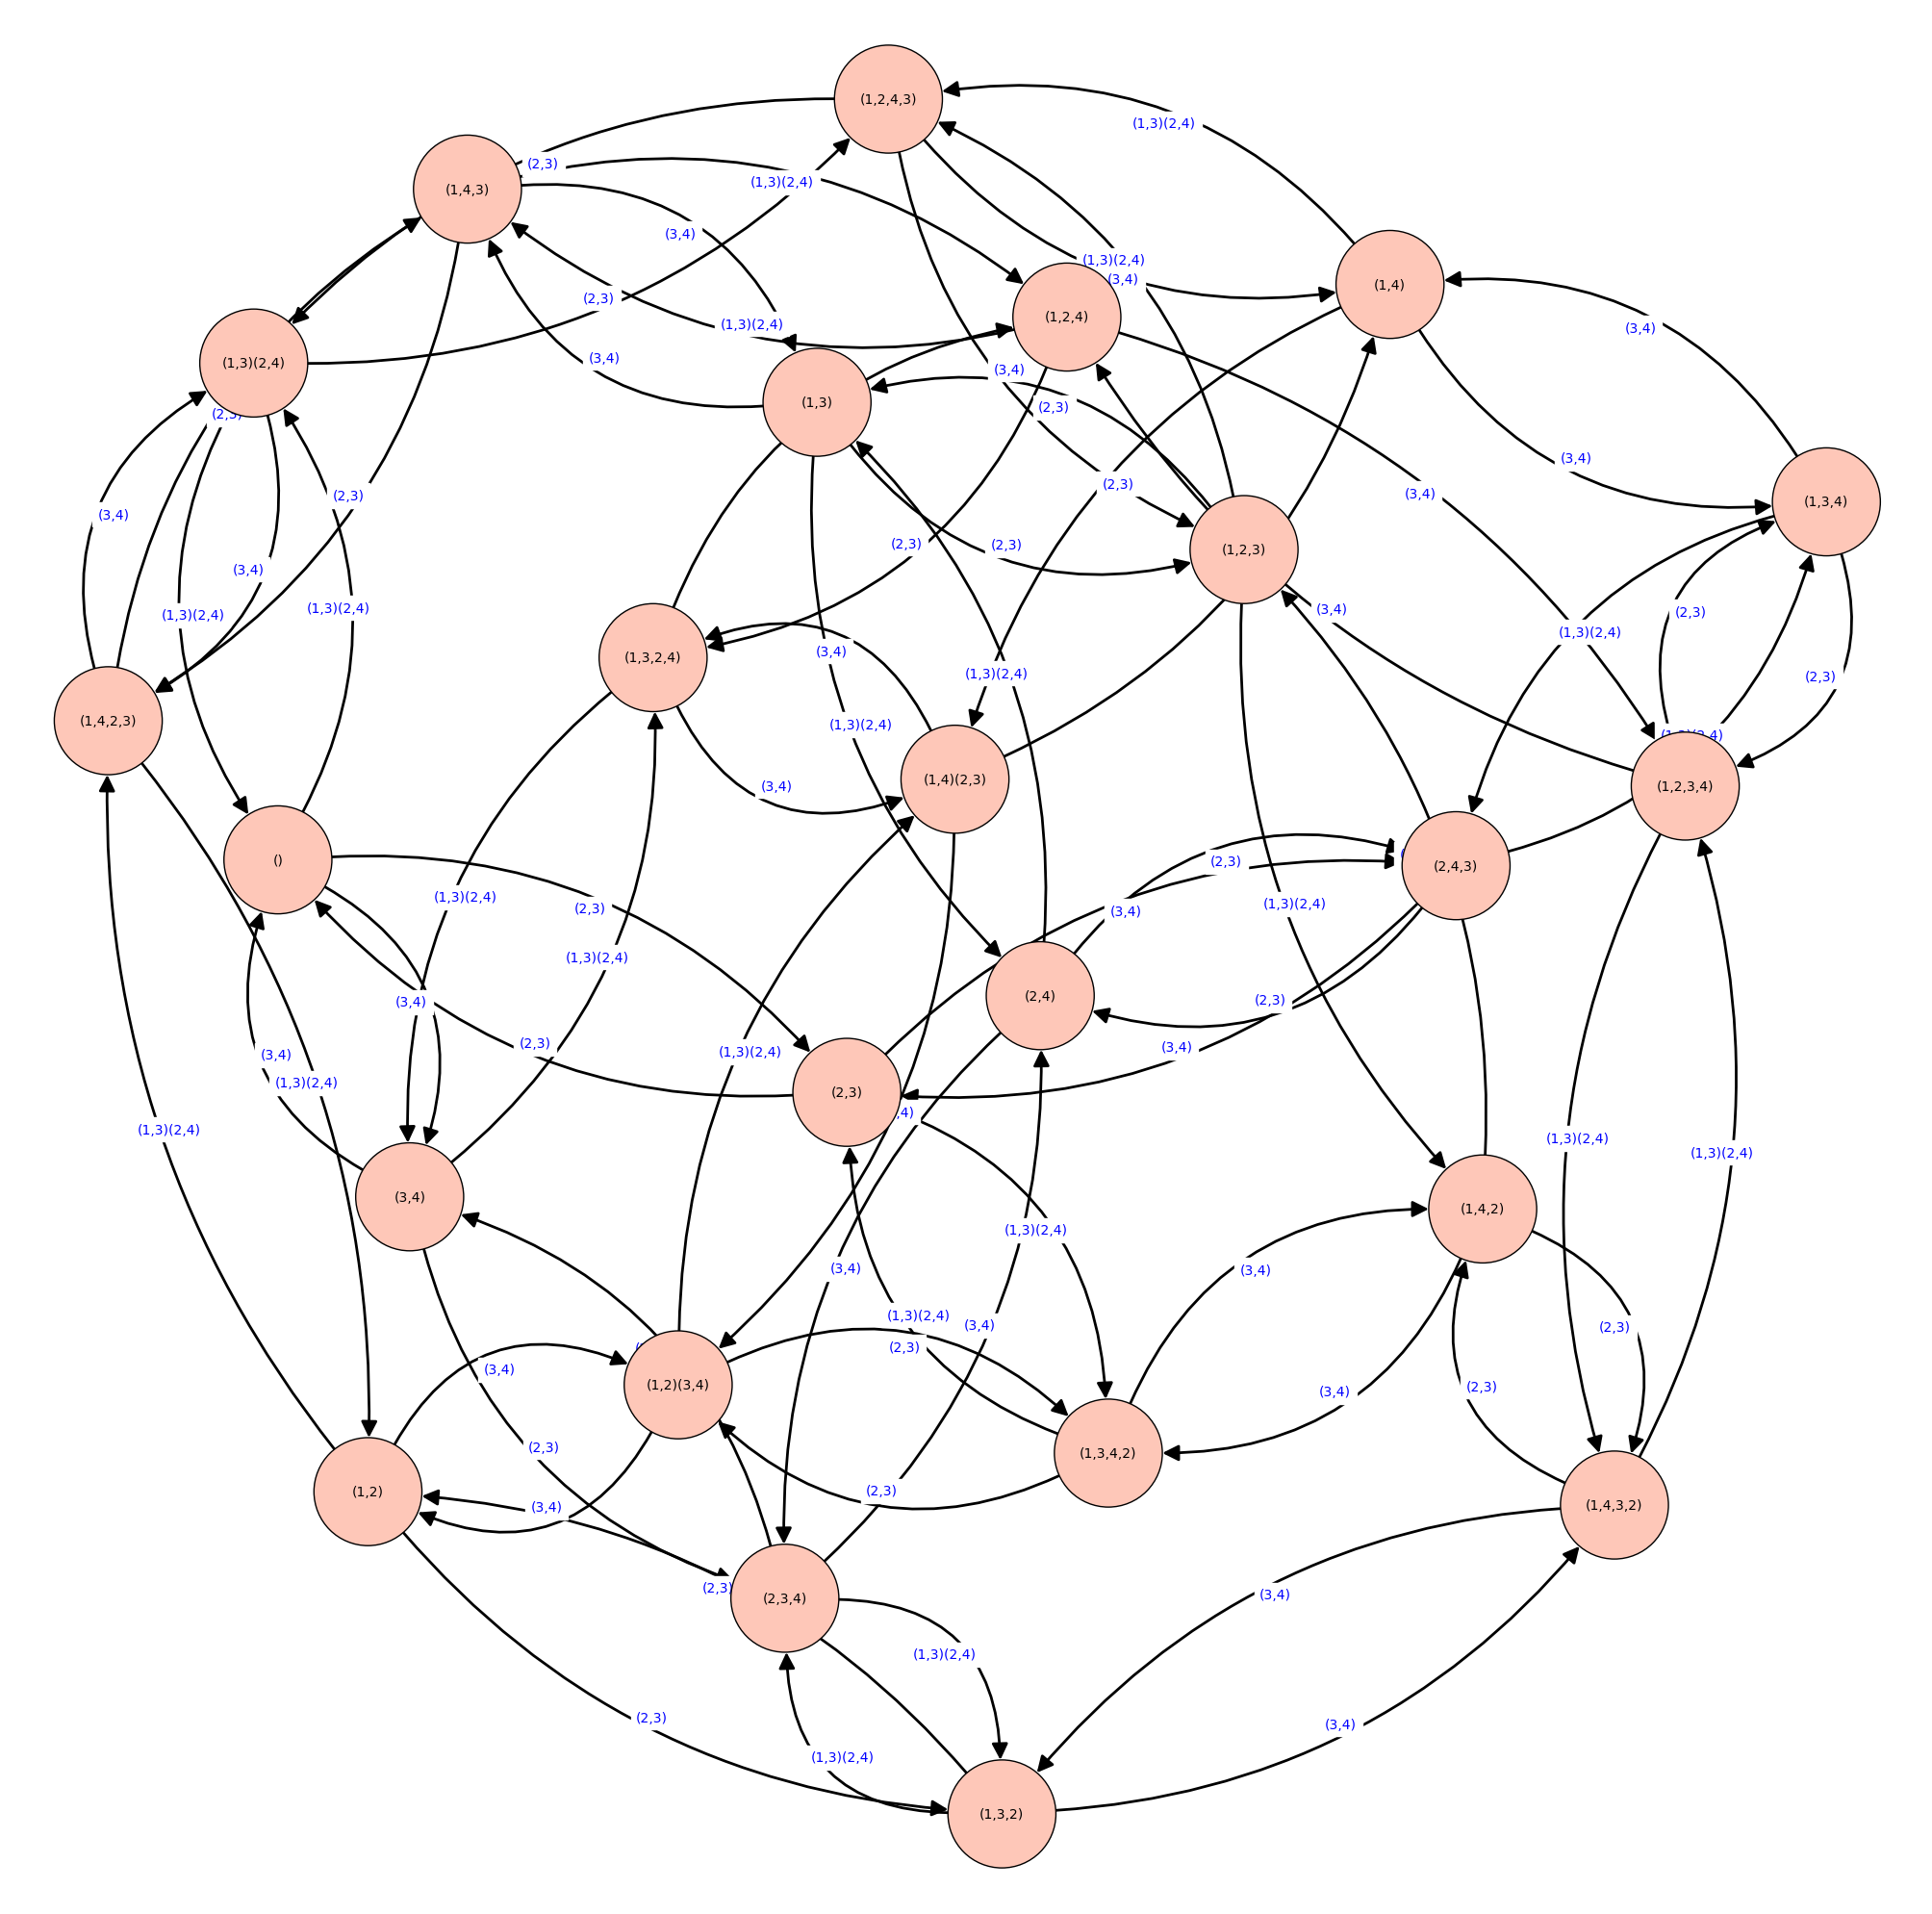

In [138]:
d4 = S4.cayley_graph(generators=Generateur4)
d4.show(figsize=30,edge_labels=True)

In [139]:
d4.order()

24

In [140]:
d4.show3d(bgcolor=(0,0,0), arc_color=(1,1,1), vertex_size=0.02, arc_size=0.007, arc_size2=0.01, xres=1000, yres=800, iterations=200)

Graphics3d Object